In [1]:
# C train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at C line only
C_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('C')]

In [4]:
# look at all station names
C_train_all['STATION'].unique()

array(['103 ST', '116 ST', '125 ST', '135 ST', '14 ST', '145 ST',
       '155 ST', '163 ST-AMSTERDM', '168 ST', '23 ST', '34 ST-PENN STA',
       '42 ST-PORT AUTH', '50 ST', '59 ST COLUMBUS', '72 ST', '8 AV',
       '81 ST-MUSEUM', '86 ST', '96 ST', 'BROADWAY JCT', 'CANAL ST',
       'CATHEDRAL PKWY', 'CHAMBERS ST', 'CLINTON-WASH AV', 'EUCLID AV',
       'FRANKLIN AV', 'FULTON ST', 'HIGH ST', 'HOYT-SCHER',
       'JAY ST-METROTEC', 'KINGSTON-THROOP', 'LAFAYETTE AV', 'LIBERTY AV',
       'NOSTRAND AV', 'PARK PLACE', 'RALPH AV', 'ROCKAWAY AV',
       'SHEPHERD AV', 'SPRING ST', 'TIMES SQ-42 ST', 'UTICA AV',
       'VAN SICLEN AVE', 'W 4 ST-WASH SQ', 'WORLD TRADE CTR'],
      dtype=object)

In [5]:
# check station count
C_train_all['STATION'].count()

51

In [7]:
# needs further cleaning
C_train_all["STATION"].replace("8 AV", value="50 ST", inplace=True)
C_train_all["STATION"].replace("TIMES SQ-42 ST", value="42 ST-PORT AUTH", inplace=True)
C_train_all["STATION"].replace("WORLD TRADE CTR", value="CHAMBERS ST", inplace=True)
C_train_all["STATION"].replace("PARK PLACE", value="CHAMBERS ST", inplace=True)

In [8]:
# now sum same name rows
C_commuters = C_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
C_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
103 ST,4581.0,1183.0
116 ST,5165.0,2321.0
125 ST,8707.0,6616.0
135 ST,3747.0,3475.0
14 ST,3919.0,11802.0


In [9]:
# order stations in excel
# save as csv
C_commuters.to_csv('C_commuters.csv')

In [10]:
# open ordered CSV
csv_path_C = 'C_commuters_order.csv'
C_commuters_order = pd.read_csv(csv_path_C, encoding="utf-8")
C_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,168 ST,7006,4972
1,163 ST-AMSTERDM,5308,995
2,155 ST,3019,730
3,145 ST,13017,5495
4,135 ST,3747,3475


In [11]:
C_commuters_order['AM_AVG_ENTER'] = C_commuters_order['AM_ENTERS']/5

In [12]:
C_commuters_order['AM_AVG_EXIT'] = C_commuters_order['AM_EXITS']/5
C_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,168 ST,7006,4972,1401.2,994.4
1,163 ST-AMSTERDM,5308,995,1061.6,199.0
2,155 ST,3019,730,603.8,146.0
3,145 ST,13017,5495,2603.4,1099.0
4,135 ST,3747,3475,749.4,695.0


In [13]:
# order stations in excel
# save as csv
C_commuters_order.to_csv('C_commuters_final.csv')

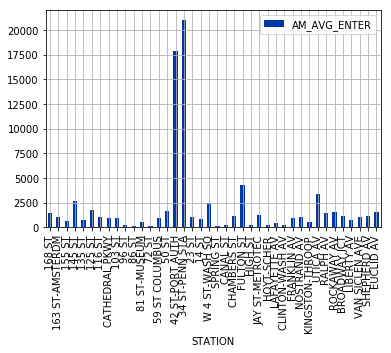

In [14]:
# graph C Train AM AVG ENTERS
plt = C_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#0039A6')
plt.grid()

# save the fig
plt.figure.savefig('C-AM-enter.pdf')

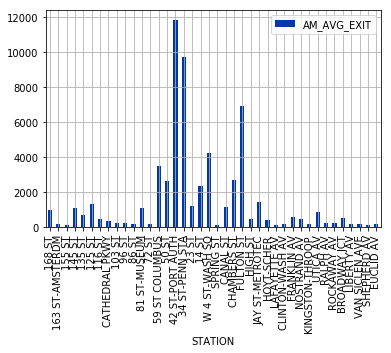

In [15]:
# graph C Train AM AVG EXITS
plt = C_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#0039A6')
plt.grid()

# save the fig
plt.figure.savefig('C-AM-exit.pdf')